<a href="https://colab.research.google.com/github/elsyanares/Deep-Learning-Computational-Intelligence/blob/main/Elsya_Nareswari_2106702535_Komputasi_Intelegensi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Elsya Nareswari

2106702535

In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Library untuk manipulasi data
import pandas as pd
import numpy as np

# Library untuk preprocessing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, explained_variance_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Library untuk membangun dan melatih model
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
import keras_tuner as kt

# Library untuk visualisasi
import matplotlib.pyplot as plt

# Library untuk pengolahan file dan sistem
import os


In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path, _ = os.path.splitext(zip_path)

# Baca file CSV dari path
data = pd.read_csv(csv_path)

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Tampilkan 5 baris pertama dataset
print("5 baris pertama dataset:")
print(data.head())

# Tampilkan informasi tentang dataset
print("\nInformasi dataset:")
print(data.info())

# Tampilkan statistik deskriptif
print("\nStatistik deskriptif dataset:")
print(data.describe())

5 baris pertama dataset:
             Date Time  p (mbar)  T (degC)  Tpot (K)  Tdew (degC)  rh (%)  \
0  01.01.2009 00:10:00    996.52     -8.02    265.40        -8.90    93.3   
1  01.01.2009 00:20:00    996.57     -8.41    265.01        -9.28    93.4   
2  01.01.2009 00:30:00    996.53     -8.51    264.91        -9.31    93.9   
3  01.01.2009 00:40:00    996.51     -8.31    265.12        -9.07    94.2   
4  01.01.2009 00:50:00    996.51     -8.27    265.15        -9.04    94.1   

   VPmax (mbar)  VPact (mbar)  VPdef (mbar)  sh (g/kg)  H2OC (mmol/mol)  \
0          3.33          3.11          0.22       1.94             3.12   
1          3.23          3.02          0.21       1.89             3.03   
2          3.21          3.01          0.20       1.88             3.02   
3          3.26          3.07          0.19       1.92             3.08   
4          3.27          3.08          0.19       1.92             3.09   

   rho (g/m**3)  wv (m/s)  max. wv (m/s)  wd (deg)  
0       

In [ ]:
#Pilih kolom yang relevan (suhu)
temp_data = data['T (degC)'].values

In [ ]:
# 4. Normalisasi data ke [0, 1]
scaler = MinMaxScaler()
temp_data = scaler.fit_transform(temp_data.reshape(-1, 1))

In [ ]:
# 5. Fungsi untuk membuat data sekuensial
def create_sequences(data, window_size):
    inputs, outputs = [], []
    for i in range(len(data) - window_size):
        inputs.append(data[i:i + window_size])
        outputs.append(data[i + window_size])
    return np.array(inputs), np.array(outputs)

In [ ]:
# 6. Buat data sekuensial
window_size = 24  # Prediksi berdasarkan 24 jam sebelumnya
X, y = create_sequences(temp_data, window_size)

In [ ]:
# 7. Split data menjadi training dan testing
split = int(0.8 * len(X))  # 80% data untuk training
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# 8. Bangun model Modern RNN (GRU) tanpa tuning
model_rnn = Sequential([
    GRU(64, activation='tanh', return_sequences=False, input_shape=(window_size, 1)),
    Dropout(0.2),  # Regularisasi untuk mengurangi overfitting
    Dense(1)  # Output 1 nilai untuk prediksi suhu
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Kompilasi model
model_rnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
# Latih model tanpa tuning
history_rnn = model_rnn.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 52s 5ms/step - loss: 0.0026 - mae: 0.0271 - val_loss: 2.2211e-05 - val_mae: 0.0034
Epoch 2/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 1.1438e-04 - mae: 0.0077 - val_loss: 1.5622e-05 - val_mae: 0.0029
Epoch 3/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 1.0946e-04 - mae: 0.0074 - val_loss: 4.0221e-05 - val_mae: 0.0056
Epoch 4/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 1.0711e-04 - mae: 0.0073 - val_loss: 1.9848e-05 - val_mae: 0.0033
Epoch 5/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - loss: 1.0544e-04 - mae: 0.0072 - val_loss: 2.4225e-05 - val_mae: 0.0041
Epoch 6/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - loss: 1.0465e-04 - mae: 0.0072 - val_loss: 1.7128e-05 - val_mae: 0.0030
Epoch 7/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - loss: 1.0614e-04 - mae: 0.0072 - val_loss: 1.8932e-05 - val_mae: 0.0034
Epoch 8/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - loss: 1.0459e-04 - mae: 0.0072 - val_loss: 2

In [ ]:
# Prediksi dengan model tanpa tuning
y_pred_rnn = model_rnn.predict(X_test)


2629/2629 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:
# Evaluasi model tanpa tuning
test_loss_rnn, test_mae_rnn = model_rnn.evaluate(X_test, y_test)
print(f"Modern RNN (Tanpa Tuning) - Test Loss: {test_loss_rnn}, Test MAE: {test_mae_rnn}")

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 2.0985e-05 - mae: 0.0034
Modern RNN (Tanpa Tuning) - Test Loss: 1.8452725271345116e-05, Test MAE: 0.003189767710864544


In [ ]:
# Konversi hasil prediksi ke skala asli
y_pred_inv_rnn = scaler.inverse_transform(y_pred_rnn)

In [ ]:
# Konversi nilai target sebenarnya ke skala asli  <--- This line was added
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1)) #<--- This line was added


In [ ]:
# Hitung metrik tambahan untuk model tanpa tuning
rmse_rnn = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv_rnn))
r2_rnn = r2_score(y_test_inv, y_pred_inv_rnn)
mape_rnn = mean_absolute_percentage_error(y_test_inv, y_pred_inv_rnn)

print(f"Modern RNN (Tanpa Tuning) - RMSE: {rmse_rnn}")
print(f"Modern RNN (Tanpa Tuning) - R2 Score: {r2_rnn}")
print(f"Modern RNN (Tanpa Tuning) - MAPE: {mape_rnn * 100:.2f}%")

Modern RNN (Tanpa Tuning) - RMSE: 0.25898562627803656
Modern RNN (Tanpa Tuning) - R2 Score: 0.9989761012916293
Modern RNN (Tanpa Tuning) - MAPE: 9632855816849.54%


In [ ]:
# 8. Definisikan model untuk Hyperparameter Tuning
def build_model(hp):
    model = Sequential()
    model.add(GRU(units=hp.Int('units', min_value=32, max_value=128, step=32),
                  activation='tanh', input_shape=(window_size, 1)))
    model.add(Dense(1))
    model.compile(optimizer=tf.keras.optimizers.Adam(
                      learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                  loss='mse', metrics=['mae'])
    return model

In [ ]:
# 9. Tuning hyperparameter
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=1,
    directory='my_dir',
    project_name='jena_rnn_tuning'
)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Trial 10 Complete [00h 06m 43s]
val_loss: 1.1937125236727297e-05

Best val_loss So Far: 1.1902092410309706e-05
Total elapsed time: 01h 09m 06s


In [ ]:
# 10. Pilih hyperparameter terbaik
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Hyperparameter terbaik:
- Jumlah unit: {best_hps.get('units')}
- Learning rate: {best_hps.get('learning_rate')}
""")


Hyperparameter terbaik:
- Jumlah unit: 64
- Learning rate: 0.001



In [ ]:
# 11. Bangun model terbaik
best_model = tuner.hypermodel.build(best_hps)

# 12. Latih model terbaik
history = best_model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=32)

# 13. Evaluasi model
test_loss, test_mae = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

Epoch 1/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 0.0022 - mae: 0.0121 - val_loss: 1.6365e-05 - val_mae: 0.0026
Epoch 2/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 1.7586e-05 - mae: 0.0030 - val_loss: 1.2015e-05 - val_mae: 0.0022
Epoch 3/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 1.3767e-05 - mae: 0.0026 - val_loss: 1.1927e-05 - val_mae: 0.0022
Epoch 4/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 39s 5ms/step - loss: 1.3643e-05 - mae: 0.0025 - val_loss: 1.2139e-05 - val_mae: 0.0022
Epoch 5/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 1.3226e-05 - mae: 0.0025 - val_loss: 1.6445e-05 - val_mae: 0.0030
Epoch 6/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 1.3055e-05 - mae: 0.0025 - val_loss: 2.0065e-05 - val_mae: 0.0035
Epoch 7/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 1.3026e-05 - mae: 0.0024 - val_loss: 1.1921e-05 - val_mae: 0.0022
Epoch 8/20
8411/8411 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - loss: 1.2783e-05 - mae: 0.0024 - val_loss: 1

In [ ]:
# 14. Prediksi
y_pred = best_model.predict(X_test)

2629/2629 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step


In [ ]:

# Konversi hasil ke skala asli
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_inv = scaler.inverse_transform(y_pred)


In [ ]:
print("Nilai minimum y_test_inv:", np.min(y_test_inv))

Nilai minimum y_test_inv: -13.93


In [ ]:
mape_tuned = mean_absolute_percentage_error(y_test_inv + 1e-8, y_pred_inv_rnn)

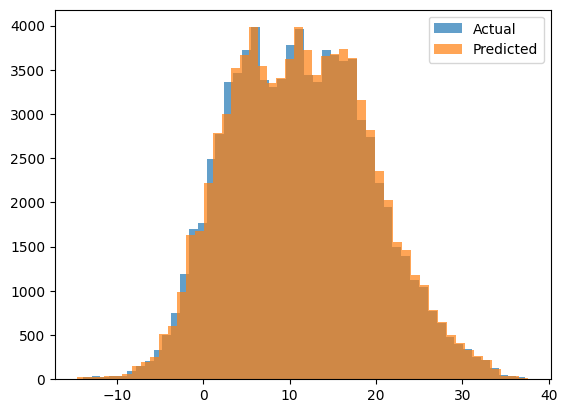

In [ ]:
plt.hist(y_test_inv, bins=50, alpha=0.7, label="Actual")
plt.hist(y_pred_inv_rnn, bins=50, alpha=0.7, label="Predicted")
plt.legend()
plt.show()

In [ ]:
# 15. Hitung metrik tambahan
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
r2 = r2_score(y_test_inv, y_pred_inv)
mape = mean_absolute_percentage_error(y_test_inv, y_pred_inv)
explained_variance = explained_variance_score(y_test_inv, y_pred_inv)
mbe = np.mean(y_pred_inv - y_test_inv)


print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"Explained Variance Score: {explained_variance}")
print(f"Mean Bias Error (MBE): {mbe}")

RMSE: 0.2502769939407275
R2 Score: 0.9990438026571545
MAPE: 13802636762732.56%
Explained Variance Score: 0.9993485967846103
Mean Bias Error (MBE): 0.14130270031086484


In [ ]:
# 16. Kategorisasi data untuk confusion matrix
low_threshold = 10
high_threshold = 25

def categorize_temperature(temps):
    categories = []
    for temp in temps:
        if temp < low_threshold:
            categories.append('Low')
        elif temp > high_threshold:
            categories.append('High')
        else:
            categories.append('Medium')
    return categories

y_test_categories = categorize_temperature(y_test_inv.flatten())
y_pred_categories = categorize_temperature(y_pred_inv.flatten())

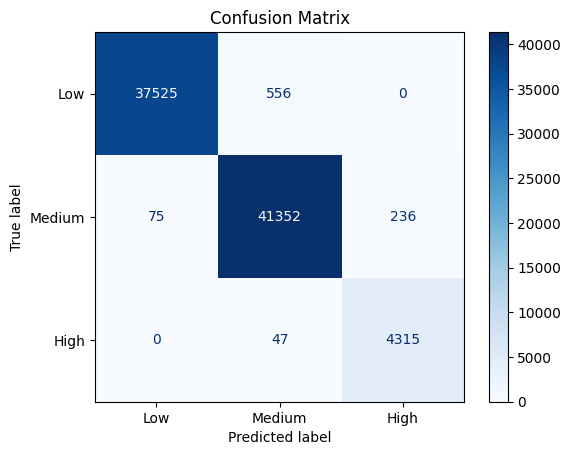

In [ ]:
# 17. Confusion Matrix
cm = confusion_matrix(y_test_categories, y_pred_categories, labels=['Low', 'Medium', 'High'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

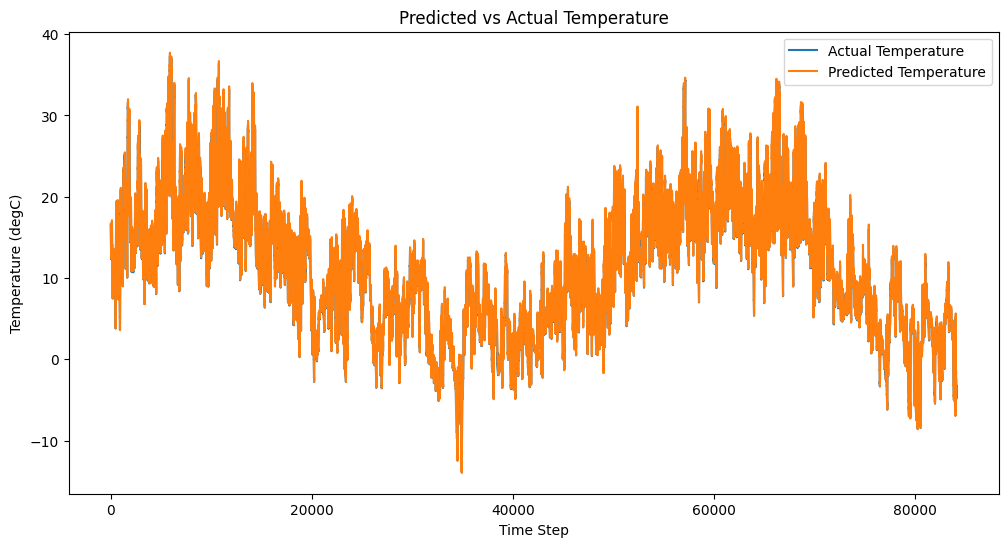

In [ ]:
# 18. Visualisasi Prediksi vs Nilai Sebenarnya
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual Temperature')
plt.plot(y_pred_inv, label='Predicted Temperature')
plt.title('Predicted vs Actual Temperature')
plt.xlabel('Time Step')
plt.ylabel('Temperature (degC)')
plt.legend()
plt.show()
